# Lab 1
##  Recreating an Index

Washington census tracts with American Community Survey data. [Source from Seattle GeoData](https://data-seattlecitygis.opendata.arcgis.com/datasets/51f795b05d284f3e82902de8de06939e/explore?showTable=true). Area boundaries with American Community Survey data and attachments of census reports. Community Reporting Areas (CRAs) were established in 2004 as a standard, consistent, citywide geography for reporting purposes. There are 53 CRAs composed of from one to six census tracts.




In [1]:
import sys
sys.setrecursionlimit(15000)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns
from scipy.stats import norm

##  Collects and Cleans the data to create indicators

In [31]:

data_shape= gpd.read_file('Racial_and_Social_Equity_Composite_Index/9362e3b7-801d-4b8e-9a79-cf70afe2d10d202037-1-12y9ny2.x61ol.shp')
data_shape.columns =['OBJECTID', 'GEOID10', 'NAME10', 'NAMELSAD10', 'ACRES_TOTAL', 'PCT_PEOPLE_OF_COLOR', 'PTL_PEOPLE_OF_COLOR', 'PCT_ENGLISH_LESSTHAN_VERY_WELL', 'PTL_ENGLISH_LESSTHAN_VERY_WELL', 'PCT_FOREIGN_BORN', 'PTL_FOREIGN_BORN', 'PCT_POP_INC_UNDER_200_POVERTY', 'PTL_POP_INC_UNDER_200_POVERTY', 'PCT_LESS_BACHELOR_DEGREE', 'PTL_LESS_BACHELOR_DEGREE', 'PCT_ADULTNOLEISUREPHYSACTIVITY', 'PCT_ADULT_WITH_DIABETES', 'PCT_ADULT_OBESE', 'PCT_ADULTMENTALHEALTHNOTGOOD', 'PCT_ADULT_WITH_ASTHMA', 'PCT_ADULT_WITH_DISABILITIES', 'PCT_LOW_LIFE_EXPECT_AT_BIRTH', 'PTL_ADULTNOLEISUREPHYSACTIVITY', 'PTL_ADULT_DIAGNOSED_DIABETES', 'PTL_ADULT_OBESE', 'PTL_ADULTMENTALHEALTHNOTGOOD', 'PTL_ADULT_WITH_ASTHMA', 'PTL_ADULT_WITH_DISABILITIES', 'PTL_LOW_LIFE_EXPECT_AT_BIRTH', 'COMPOSITE_PERCENTILE', 'COMPOSITE_QUINTILE', 'RACE_ELL_ORIGINS_PERCENTILE', 'RACE_ELL_ORIGINS_QUINTILE', 'SOCIOECONOMIC_PERCENTILE', 'SOCIOECONOMIC_QUINTILE', 'HEALTH_PERCENTILE', 'HEALTH_QUINTILE', 'Shape__Area', 'Shape__Length', 'geometry']



In [4]:

data_shape = data_shape.drop([ 'SOCIOECONOMIC_PERCENTILE', 'SOCIOECONOMIC_QUINTILE', 'HEALTH_PERCENTILE', 'HEALTH_QUINTILE'], axis=1)

In [5]:
print(list(data_shape.columns))

['OBJECTID', 'GEOID10', 'NAME10', 'NAMELSAD10', 'ACRES_TOTAL', 'PCT_PEOPLE_OF_COLOR', 'PTL_PEOPLE_OF_COLOR', 'PCT_ENGLISH_LESSTHAN_VERY_WELL', 'PTL_ENGLISH_LESSTHAN_VERY_WELL', 'PCT_FOREIGN_BORN', 'PTL_FOREIGN_BORN', 'PCT_POP_INC_UNDER_200_POVERTY', 'PTL_POP_INC_UNDER_200_POVERTY', 'PCT_LESS_BACHELOR_DEGREE', 'PTL_LESS_BACHELOR_DEGREE', 'PCT_ADULTNOLEISUREPHYSACTIVITY', 'PCT_ADULT_WITH_DIABETES', 'PCT_ADULT_OBESE', 'PCT_ADULTMENTALHEALTHNOTGOOD', 'PCT_ADULT_WITH_ASTHMA', 'PCT_ADULT_WITH_DISABILITIES', 'PCT_LOW_LIFE_EXPECT_AT_BIRTH', 'PTL_ADULTNOLEISUREPHYSACTIVITY', 'PTL_ADULT_DIAGNOSED_DIABETES', 'PTL_ADULT_OBESE', 'PTL_ADULTMENTALHEALTHNOTGOOD', 'PTL_ADULT_WITH_ASTHMA', 'PTL_ADULT_WITH_DISABILITIES', 'PTL_LOW_LIFE_EXPECT_AT_BIRTH', 'COMPOSITE_PERCENTILE', 'COMPOSITE_QUINTILE', 'RACE_ELL_ORIGINS_PERCENTILE', 'RACE_ELL_ORIGINS_QUINTILE', 'Shape__Area', 'Shape__Length', 'geometry']


In [6]:
data_shape['HealthIndexPercentile'] = (data_shape['PTL_ADULTNOLEISUREPHYSACTIVITY'] + data_shape['PTL_ADULT_DIAGNOSED_DIABETES'] + data_shape['PTL_ADULT_OBESE'] +data_shape['PTL_ADULTMENTALHEALTHNOTGOOD'] + data_shape['PTL_ADULT_WITH_ASTHMA'] + data_shape['PTL_ADULT_WITH_DISABILITIES'] + data_shape['PTL_LOW_LIFE_EXPECT_AT_BIRTH'])/7
data_shape['SOCIOECONOMIC_PERCENTILE'] = (data_shape['PTL_LESS_BACHELOR_DEGREE'] + data_shape['PTL_LESS_BACHELOR_DEGREE'])/2

In [7]:
print(list(data_shape.columns))


['OBJECTID', 'GEOID10', 'NAME10', 'NAMELSAD10', 'ACRES_TOTAL', 'PCT_PEOPLE_OF_COLOR', 'PTL_PEOPLE_OF_COLOR', 'PCT_ENGLISH_LESSTHAN_VERY_WELL', 'PTL_ENGLISH_LESSTHAN_VERY_WELL', 'PCT_FOREIGN_BORN', 'PTL_FOREIGN_BORN', 'PCT_POP_INC_UNDER_200_POVERTY', 'PTL_POP_INC_UNDER_200_POVERTY', 'PCT_LESS_BACHELOR_DEGREE', 'PTL_LESS_BACHELOR_DEGREE', 'PCT_ADULTNOLEISUREPHYSACTIVITY', 'PCT_ADULT_WITH_DIABETES', 'PCT_ADULT_OBESE', 'PCT_ADULTMENTALHEALTHNOTGOOD', 'PCT_ADULT_WITH_ASTHMA', 'PCT_ADULT_WITH_DISABILITIES', 'PCT_LOW_LIFE_EXPECT_AT_BIRTH', 'PTL_ADULTNOLEISUREPHYSACTIVITY', 'PTL_ADULT_DIAGNOSED_DIABETES', 'PTL_ADULT_OBESE', 'PTL_ADULTMENTALHEALTHNOTGOOD', 'PTL_ADULT_WITH_ASTHMA', 'PTL_ADULT_WITH_DISABILITIES', 'PTL_LOW_LIFE_EXPECT_AT_BIRTH', 'COMPOSITE_PERCENTILE', 'COMPOSITE_QUINTILE', 'RACE_ELL_ORIGINS_PERCENTILE', 'RACE_ELL_ORIGINS_QUINTILE', 'Shape__Area', 'Shape__Length', 'geometry', 'HealthIndexPercentile', 'SOCIOECONOMIC_PERCENTILE']


In [8]:
data_shape.tail()

,OBJECTID,GEOID10,NAME10,NAMELSAD10,ACRES_TOTAL,PCT_PEOPLE_OF_COLOR,PTL_PEOPLE_OF_COLOR,PCT_ENGLISH_LESSTHAN_VERY_WELL,PTL_ENGLISH_LESSTHAN_VERY_WELL,PCT_FOREIGN_BORN,...,PTL_LOW_LIFE_EXPECT_AT_BIRTH,COMPOSITE_PERCENTILE,COMPOSITE_QUINTILE,RACE_ELL_ORIGINS_PERCENTILE,RACE_ELL_ORIGINS_QUINTILE,Shape__Area,Shape__Length,geometry,HealthIndexPercentile,SOCIOECONOMIC_PERCENTILE
130,131,53033008300,83,Census Tract 83,58.672725,0.241817,0.414,0.030110,0.346,0.162659,...,0.843,0.587,Middle,0.459,Middle,2.555784e+06,9121.891026,"POLYGON ((-122.32338 47.60909, -122.32449 47.6...",0.548571,0.602
131,132,53033006300,63,Census Tract 63,571.208999,0.119592,0.031,0.019510,0.241,0.089983,...,0.046,0.046,Lowest,0.098,Lowest,2.488186e+07,26361.536517,"POLYGON ((-122.28153 47.62605, -122.28255 47.6...",0.196429,0.046
132,133,53033008001,80.01,Census Tract 80.01,120.234979,0.383779,0.677,0.013495,0.121,0.324422,...,0.219,0.422,Middle,0.602,Second highest,5.237436e+06,19254.633866,"POLYGON ((-122.35136 47.61859, -122.35079 47.6...",0.262857,0.331
133,134,53033007100,71,Census Tract 71,213.017984,0.328319,0.610,0.083499,0.662,0.281280,...,0.346,0.414,Middle,0.677,Second highest,9.279063e+06,16344.776317,"POLYGON ((-122.36429 47.62502, -122.36421 47.6...",0.267000,0.256
134,135,53033026400,264,Census Tract 264,15.906251,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,NaN,None,6.928763e+05,5973.484373,"POLYGON ((-122.33096 47.52099, -122.33090 47.5...",NaN,NaN


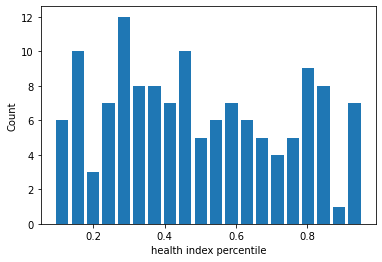

In [9]:
plt.hist(data_shape.HealthIndexPercentile, bins=20, rwidth=0.8)
plt.xlabel('health index percentile')
plt.ylabel('Count')
plt.show()

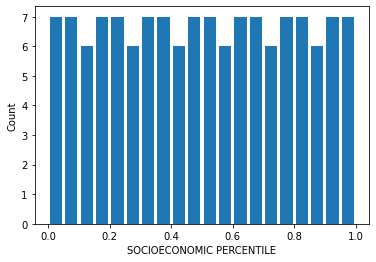

In [10]:
plt.hist(data_shape.SOCIOECONOMIC_PERCENTILE, bins=20, rwidth=0.8)
plt.xlabel('SOCIOECONOMIC PERCENTILE')
plt.ylabel('Count')
plt.show()

#  Plot bell curve along with histogram for our dataset

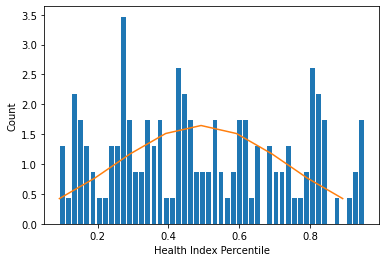

In [11]:
from scipy.stats import norm
import numpy as np
plt.hist(data_shape.HealthIndexPercentile, bins=50, rwidth=0.8, density=True)
plt.xlabel('Health Index Percentile')
plt.ylabel('Count')

rng = np.arange(data_shape.HealthIndexPercentile.min(), data_shape.HealthIndexPercentile.max(), 0.1)
plt.plot(rng, norm.pdf(rng,data_shape.HealthIndexPercentile.mean(),data_shape.HealthIndexPercentile.std()))

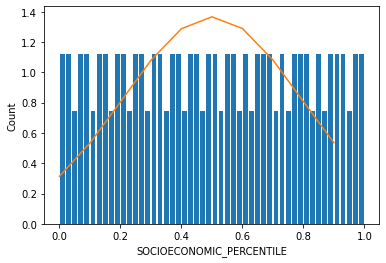

In [12]:
from scipy.stats import norm
import numpy as np
plt.hist(data_shape.SOCIOECONOMIC_PERCENTILE, bins=50, rwidth=0.8, density=True)
plt.xlabel('SOCIOECONOMIC_PERCENTILE')
plt.ylabel('Count')

rng = np.arange(data_shape.SOCIOECONOMIC_PERCENTILE.min(), data_shape.SOCIOECONOMIC_PERCENTILE.max(), 0.1)
plt.plot(rng, norm.pdf(rng,data_shape.SOCIOECONOMIC_PERCENTILE.mean(),data_shape.SOCIOECONOMIC_PERCENTILE.std()))

In [13]:
data_shape.HealthIndexPercentile.mean()

0.4919445628997865

In [14]:
data_shape.HealthIndexPercentile.std()

0.24251072905935342

# Outlier detection and removal using 3 standard deviation

One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [15]:
upper_limit = data_shape.HealthIndexPercentile.mean() + 3*data_shape.HealthIndexPercentile.std()
upper_limit

1.2194767500778467

In [16]:
lower_limit = data_shape.HealthIndexPercentile.mean() -3*data_shape.HealthIndexPercentile.std()
lower_limit

-0.23558762427827373

Here are the outliers that are beyond 3 std dev from mean and remove these outliers and generate new dataframe

In [17]:
data_shape[(data_shape.HealthIndexPercentile>upper_limit) | (data_shape.HealthIndexPercentile<lower_limit)]
data_shape_no_outlier_std_dev = data_shape[(data_shape.HealthIndexPercentile<upper_limit) & (data_shape.HealthIndexPercentile>lower_limit)]
data_shape_no_outlier_std_dev.tail()

,OBJECTID,GEOID10,NAME10,NAMELSAD10,ACRES_TOTAL,PCT_PEOPLE_OF_COLOR,PTL_PEOPLE_OF_COLOR,PCT_ENGLISH_LESSTHAN_VERY_WELL,PTL_ENGLISH_LESSTHAN_VERY_WELL,PCT_FOREIGN_BORN,...,PTL_LOW_LIFE_EXPECT_AT_BIRTH,COMPOSITE_PERCENTILE,COMPOSITE_QUINTILE,RACE_ELL_ORIGINS_PERCENTILE,RACE_ELL_ORIGINS_QUINTILE,Shape__Area,Shape__Length,geometry,HealthIndexPercentile,SOCIOECONOMIC_PERCENTILE
129,130,53033008600,86,Census Tract 86,175.773386,0.406717,0.700,0.116188,0.745,0.188507,...,0.707,0.670,Second highest,0.707,Second highest,7.656689e+06,11738.207989,"POLYGON ((-122.31278 47.61291, -122.31280 47.6...",0.546143,0.452
130,131,53033008300,83,Census Tract 83,58.672725,0.241817,0.414,0.030110,0.346,0.162659,...,0.843,0.587,Middle,0.459,Middle,2.555784e+06,9121.891026,"POLYGON ((-122.32338 47.60909, -122.32449 47.6...",0.548571,0.602
131,132,53033006300,63,Census Tract 63,571.208999,0.119592,0.031,0.019510,0.241,0.089983,...,0.046,0.046,Lowest,0.098,Lowest,2.488186e+07,26361.536517,"POLYGON ((-122.28153 47.62605, -122.28255 47.6...",0.196429,0.046
132,133,53033008001,80.01,Census Tract 80.01,120.234979,0.383779,0.677,0.013495,0.121,0.324422,...,0.219,0.422,Middle,0.602,Second highest,5.237436e+06,19254.633866,"POLYGON ((-122.35136 47.61859, -122.35079 47.6...",0.262857,0.331
133,134,53033007100,71,Census Tract 71,213.017984,0.328319,0.610,0.083499,0.662,0.281280,...,0.346,0.414,Middle,0.677,Second highest,9.279063e+06,16344.776317,"POLYGON ((-122.36429 47.62502, -122.36421 47.6...",0.267000,0.256


# Calculate the Z Score

In [18]:
data_shape['zscore_health'] = ( data_shape.HealthIndexPercentile - data_shape.HealthIndexPercentile.mean() ) / data_shape.HealthIndexPercentile.std()

data_shape['zscore_income'] = ( data_shape.SOCIOECONOMIC_PERCENTILE - data_shape.SOCIOECONOMIC_PERCENTILE.mean() ) / data_shape.SOCIOECONOMIC_PERCENTILE.std()
data_shape.head(5)

,OBJECTID,GEOID10,NAME10,NAMELSAD10,ACRES_TOTAL,PCT_PEOPLE_OF_COLOR,PTL_PEOPLE_OF_COLOR,PCT_ENGLISH_LESSTHAN_VERY_WELL,PTL_ENGLISH_LESSTHAN_VERY_WELL,PCT_FOREIGN_BORN,...,COMPOSITE_QUINTILE,RACE_ELL_ORIGINS_PERCENTILE,RACE_ELL_ORIGINS_QUINTILE,Shape__Area,Shape__Length,geometry,HealthIndexPercentile,SOCIOECONOMIC_PERCENTILE,zscore_health,zscore_income
0,1,53033005900,59,Census Tract 59,447.919508,0.184537,0.241,0.013041,0.098,0.095335,...,Lowest,0.181,Lowest,1.951137e+07,24649.766671,"POLYGON ((-122.37118 47.65770, -122.37101 47.6...",0.289714,0.076,-0.833902,-1.454231
1,2,53033004700,47,Census Tract 47,490.845743,0.181284,0.211,0.038452,0.444,0.105566,...,Second lowest,0.301,Second lowest,2.138124e+07,22313.994871,"POLYGON ((-122.36617 47.67235, -122.36617 47.6...",0.383000,0.437,-0.449236,-0.217513
2,3,53033001900,19,Census Tract 19,410.970985,0.301733,0.557,0.079266,0.647,0.191898,...,Second highest,0.617,Second highest,1.790190e+07,21117.783503,"POLYGON ((-122.31769 47.70129, -122.31766 47.7...",0.604429,0.587,0.463831,0.296358
3,4,53033001300,13,Census Tract 13,292.551184,0.405455,0.692,0.127567,0.767,0.231492,...,Second highest,0.730,Second highest,1.274353e+07,15034.470142,"POLYGON ((-122.33396 47.70685, -122.33395 47.7...",0.644286,0.692,0.628183,0.656068
4,5,53033004100,41,Census Tract 41,787.830676,0.164442,0.158,0.045527,0.519,0.150340,...,Lowest,0.361,Second lowest,3.431790e+07,35293.161989,"POLYGON ((-122.25158 47.67384, -122.25159 47.6...",0.156429,0.038,-1.383510,-1.584412


## Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [19]:
data_shape[data_shape['zscore_health']>3]
data_shape[data_shape['zscore_income']>3]

,OBJECTID,GEOID10,NAME10,NAMELSAD10,ACRES_TOTAL,PCT_PEOPLE_OF_COLOR,PTL_PEOPLE_OF_COLOR,PCT_ENGLISH_LESSTHAN_VERY_WELL,PTL_ENGLISH_LESSTHAN_VERY_WELL,PCT_FOREIGN_BORN,...,COMPOSITE_QUINTILE,RACE_ELL_ORIGINS_PERCENTILE,RACE_ELL_ORIGINS_QUINTILE,Shape__Area,Shape__Length,geometry,HealthIndexPercentile,SOCIOECONOMIC_PERCENTILE,zscore_health,zscore_income


# Binning or qcut

The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.

<AxesSubplot:ylabel='Frequency'>

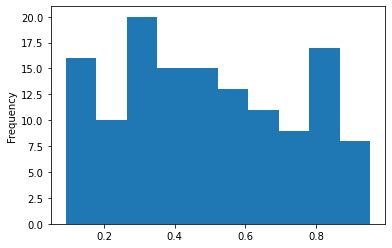

In [20]:
data_shape['HealthIndexPercentile'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

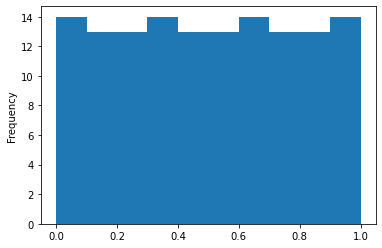

In [21]:
data_shape['SOCIOECONOMIC_PERCENTILE'].plot(kind='hist')

In [22]:
pd.qcut(data_shape['HealthIndexPercentile'], q=5)

0      (0.268, 0.398]
1      (0.268, 0.398]
2      (0.545, 0.752]
3      (0.545, 0.752]
4      (0.091, 0.268]
            ...      
130    (0.545, 0.752]
131    (0.091, 0.268]
132    (0.091, 0.268]
133    (0.091, 0.268]
134               NaN
Name: HealthIndexPercentile, Length: 135, dtype: category
Categories (5, interval[float64, right]): [(0.091, 0.268] < (0.268, 0.398] < (0.398, 0.545] < (0.545, 0.752] < (0.752, 0.953]]

In [23]:
pd.qcut(data_shape['SOCIOECONOMIC_PERCENTILE'], q=5)

0      (-0.001, 0.201]
1         (0.401, 0.6]
2         (0.401, 0.6]
3           (0.6, 0.8]
4      (-0.001, 0.201]
            ...       
130         (0.6, 0.8]
131    (-0.001, 0.201]
132     (0.201, 0.401]
133     (0.201, 0.401]
134                NaN
Name: SOCIOECONOMIC_PERCENTILE, Length: 135, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 0.201] < (0.201, 0.401] < (0.401, 0.6] < (0.6, 0.8] < (0.8, 1.0]]

In [24]:
data_shape['quantile_health'] = pd.qcut(data_shape['HealthIndexPercentile'], q=5)
data_shape.head()

,OBJECTID,GEOID10,NAME10,NAMELSAD10,ACRES_TOTAL,PCT_PEOPLE_OF_COLOR,PTL_PEOPLE_OF_COLOR,PCT_ENGLISH_LESSTHAN_VERY_WELL,PTL_ENGLISH_LESSTHAN_VERY_WELL,PCT_FOREIGN_BORN,...,RACE_ELL_ORIGINS_PERCENTILE,RACE_ELL_ORIGINS_QUINTILE,Shape__Area,Shape__Length,geometry,HealthIndexPercentile,SOCIOECONOMIC_PERCENTILE,zscore_health,zscore_income,quantile_health
0,1,53033005900,59,Census Tract 59,447.919508,0.184537,0.241,0.013041,0.098,0.095335,...,0.181,Lowest,1.951137e+07,24649.766671,"POLYGON ((-122.37118 47.65770, -122.37101 47.6...",0.289714,0.076,-0.833902,-1.454231,"(0.268, 0.398]"
1,2,53033004700,47,Census Tract 47,490.845743,0.181284,0.211,0.038452,0.444,0.105566,...,0.301,Second lowest,2.138124e+07,22313.994871,"POLYGON ((-122.36617 47.67235, -122.36617 47.6...",0.383000,0.437,-0.449236,-0.217513,"(0.268, 0.398]"
2,3,53033001900,19,Census Tract 19,410.970985,0.301733,0.557,0.079266,0.647,0.191898,...,0.617,Second highest,1.790190e+07,21117.783503,"POLYGON ((-122.31769 47.70129, -122.31766 47.7...",0.604429,0.587,0.463831,0.296358,"(0.545, 0.752]"
3,4,53033001300,13,Census Tract 13,292.551184,0.405455,0.692,0.127567,0.767,0.231492,...,0.730,Second highest,1.274353e+07,15034.470142,"POLYGON ((-122.33396 47.70685, -122.33395 47.7...",0.644286,0.692,0.628183,0.656068,"(0.545, 0.752]"
4,5,53033004100,41,Census Tract 41,787.830676,0.164442,0.158,0.045527,0.519,0.150340,...,0.361,Second lowest,3.431790e+07,35293.161989,"POLYGON ((-122.25158 47.67384, -122.25159 47.6...",0.156429,0.038,-1.383510,-1.584412,"(0.091, 0.268]"


In [25]:
data_shape['quantile_income'] = pd.qcut(data_shape['SOCIOECONOMIC_PERCENTILE'], q=5)
data_shape.head()

,OBJECTID,GEOID10,NAME10,NAMELSAD10,ACRES_TOTAL,PCT_PEOPLE_OF_COLOR,PTL_PEOPLE_OF_COLOR,PCT_ENGLISH_LESSTHAN_VERY_WELL,PTL_ENGLISH_LESSTHAN_VERY_WELL,PCT_FOREIGN_BORN,...,RACE_ELL_ORIGINS_QUINTILE,Shape__Area,Shape__Length,geometry,HealthIndexPercentile,SOCIOECONOMIC_PERCENTILE,zscore_health,zscore_income,quantile_health,quantile_income
0,1,53033005900,59,Census Tract 59,447.919508,0.184537,0.241,0.013041,0.098,0.095335,...,Lowest,1.951137e+07,24649.766671,"POLYGON ((-122.37118 47.65770, -122.37101 47.6...",0.289714,0.076,-0.833902,-1.454231,"(0.268, 0.398]","(-0.001, 0.201]"
1,2,53033004700,47,Census Tract 47,490.845743,0.181284,0.211,0.038452,0.444,0.105566,...,Second lowest,2.138124e+07,22313.994871,"POLYGON ((-122.36617 47.67235, -122.36617 47.6...",0.383000,0.437,-0.449236,-0.217513,"(0.268, 0.398]","(0.401, 0.6]"
2,3,53033001900,19,Census Tract 19,410.970985,0.301733,0.557,0.079266,0.647,0.191898,...,Second highest,1.790190e+07,21117.783503,"POLYGON ((-122.31769 47.70129, -122.31766 47.7...",0.604429,0.587,0.463831,0.296358,"(0.545, 0.752]","(0.401, 0.6]"
3,4,53033001300,13,Census Tract 13,292.551184,0.405455,0.692,0.127567,0.767,0.231492,...,Second highest,1.274353e+07,15034.470142,"POLYGON ((-122.33396 47.70685, -122.33395 47.7...",0.644286,0.692,0.628183,0.656068,"(0.545, 0.752]","(0.6, 0.8]"
4,5,53033004100,41,Census Tract 41,787.830676,0.164442,0.158,0.045527,0.519,0.150340,...,Second lowest,3.431790e+07,35293.161989,"POLYGON ((-122.25158 47.67384, -122.25159 47.6...",0.156429,0.038,-1.383510,-1.584412,"(0.091, 0.268]","(-0.001, 0.201]"


In [26]:
bin_labels_5 = ['Lowest', 'Second lowest', 'Middle', 'Second highest', 'Highest priority/Disadvantaged']
data_shape['health index quantile'] = pd.qcut(data_shape['HealthIndexPercentile'],
                              q=[0, .2, .5, .6, .8, 1],
                              labels=bin_labels_5)
data_shape.tail()

,OBJECTID,GEOID10,NAME10,NAMELSAD10,ACRES_TOTAL,PCT_PEOPLE_OF_COLOR,PTL_PEOPLE_OF_COLOR,PCT_ENGLISH_LESSTHAN_VERY_WELL,PTL_ENGLISH_LESSTHAN_VERY_WELL,PCT_FOREIGN_BORN,...,Shape__Area,Shape__Length,geometry,HealthIndexPercentile,SOCIOECONOMIC_PERCENTILE,zscore_health,zscore_income,quantile_health,quantile_income,health index quantile
130,131,53033008300,83,Census Tract 83,58.672725,0.241817,0.414,0.030110,0.346,0.162659,...,2.555784e+06,9121.891026,"POLYGON ((-122.32338 47.60909, -122.32449 47.6...",0.548571,0.602,0.233503,0.347745,"(0.545, 0.752]","(0.6, 0.8]",Second highest
131,132,53033006300,63,Census Tract 63,571.208999,0.119592,0.031,0.019510,0.241,0.089983,...,2.488186e+07,26361.536517,"POLYGON ((-122.28153 47.62605, -122.28255 47.6...",0.196429,0.046,-1.218569,-1.557005,"(0.091, 0.268]","(-0.001, 0.201]",Lowest
132,133,53033008001,80.01,Census Tract 80.01,120.234979,0.383779,0.677,0.013495,0.121,0.324422,...,5.237436e+06,19254.633866,"POLYGON ((-122.35136 47.61859, -122.35079 47.6...",0.262857,0.331,-0.944649,-0.580649,"(0.091, 0.268]","(0.201, 0.401]",Lowest
133,134,53033007100,71,Census Tract 71,213.017984,0.328319,0.610,0.083499,0.662,0.281280,...,9.279063e+06,16344.776317,"POLYGON ((-122.36429 47.62502, -122.36421 47.6...",0.267000,0.256,-0.927565,-0.837585,"(0.091, 0.268]","(0.201, 0.401]",Lowest
134,135,53033026400,264,Census Tract 264,15.906251,NaN,NaN,NaN,NaN,NaN,...,6.928763e+05,5973.484373,"POLYGON ((-122.33096 47.52099, -122.33090 47.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
bin_labels_5 = ['Lowest', 'Second lowest', 'Middle', 'Second highest', 'Highest priority/Disadvantaged']
data_shape['socieconomic index quantile'] = pd.qcut(data_shape['SOCIOECONOMIC_PERCENTILE'],
                              q=[0, .2, .5, .6, .8, 1],
                              labels=bin_labels_5)
data_shape.tail()

,OBJECTID,GEOID10,NAME10,NAMELSAD10,ACRES_TOTAL,PCT_PEOPLE_OF_COLOR,PTL_PEOPLE_OF_COLOR,PCT_ENGLISH_LESSTHAN_VERY_WELL,PTL_ENGLISH_LESSTHAN_VERY_WELL,PCT_FOREIGN_BORN,...,Shape__Length,geometry,HealthIndexPercentile,SOCIOECONOMIC_PERCENTILE,zscore_health,zscore_income,quantile_health,quantile_income,health index quantile,socieconomic index quantile
130,131,53033008300,83,Census Tract 83,58.672725,0.241817,0.414,0.030110,0.346,0.162659,...,9121.891026,"POLYGON ((-122.32338 47.60909, -122.32449 47.6...",0.548571,0.602,0.233503,0.347745,"(0.545, 0.752]","(0.6, 0.8]",Second highest,Second highest
131,132,53033006300,63,Census Tract 63,571.208999,0.119592,0.031,0.019510,0.241,0.089983,...,26361.536517,"POLYGON ((-122.28153 47.62605, -122.28255 47.6...",0.196429,0.046,-1.218569,-1.557005,"(0.091, 0.268]","(-0.001, 0.201]",Lowest,Lowest
132,133,53033008001,80.01,Census Tract 80.01,120.234979,0.383779,0.677,0.013495,0.121,0.324422,...,19254.633866,"POLYGON ((-122.35136 47.61859, -122.35079 47.6...",0.262857,0.331,-0.944649,-0.580649,"(0.091, 0.268]","(0.201, 0.401]",Lowest,Second lowest
133,134,53033007100,71,Census Tract 71,213.017984,0.328319,0.610,0.083499,0.662,0.281280,...,16344.776317,"POLYGON ((-122.36429 47.62502, -122.36421 47.6...",0.267000,0.256,-0.927565,-0.837585,"(0.091, 0.268]","(0.201, 0.401]",Lowest,Second lowest
134,135,53033026400,264,Census Tract 264,15.906251,NaN,NaN,NaN,NaN,NaN,...,5973.484373,"POLYGON ((-122.33096 47.52099, -122.33090 47.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:

print(list(data_shape.columns))

['OBJECTID', 'GEOID10', 'NAME10', 'NAMELSAD10', 'ACRES_TOTAL', 'PCT_PEOPLE_OF_COLOR', 'PTL_PEOPLE_OF_COLOR', 'PCT_ENGLISH_LESSTHAN_VERY_WELL', 'PTL_ENGLISH_LESSTHAN_VERY_WELL', 'PCT_FOREIGN_BORN', 'PTL_FOREIGN_BORN', 'PCT_POP_INC_UNDER_200_POVERTY', 'PTL_POP_INC_UNDER_200_POVERTY', 'PCT_LESS_BACHELOR_DEGREE', 'PTL_LESS_BACHELOR_DEGREE', 'PCT_ADULTNOLEISUREPHYSACTIVITY', 'PCT_ADULT_WITH_DIABETES', 'PCT_ADULT_OBESE', 'PCT_ADULTMENTALHEALTHNOTGOOD', 'PCT_ADULT_WITH_ASTHMA', 'PCT_ADULT_WITH_DISABILITIES', 'PCT_LOW_LIFE_EXPECT_AT_BIRTH', 'PTL_ADULTNOLEISUREPHYSACTIVITY', 'PTL_ADULT_DIAGNOSED_DIABETES', 'PTL_ADULT_OBESE', 'PTL_ADULTMENTALHEALTHNOTGOOD', 'PTL_ADULT_WITH_ASTHMA', 'PTL_ADULT_WITH_DISABILITIES', 'PTL_LOW_LIFE_EXPECT_AT_BIRTH', 'COMPOSITE_PERCENTILE', 'COMPOSITE_QUINTILE', 'RACE_ELL_ORIGINS_PERCENTILE', 'RACE_ELL_ORIGINS_QUINTILE', 'Shape__Area', 'Shape__Length', 'geometry', 'HealthIndexPercentile', 'SOCIOECONOMIC_PERCENTILE', 'zscore_health', 'zscore_income', 'quantile_health', 

In [30]:
data=data_shape[['OBJECTID',
                      'GEOID10',
                      'NAME10',
                      'NAMELSAD10',
                      'ACRES_TOTAL',
                      'PCT_PEOPLE_OF_COLOR',
                      'PTL_PEOPLE_OF_COLOR',
                      'PCT_ENGLISH_LESSTHAN_VERY_WELL',
                      'PTL_ENGLISH_LESSTHAN_VERY_WELL',
                      'PCT_FOREIGN_BORN',
                      'PTL_FOREIGN_BORN',
                      'PCT_POP_INC_UNDER_200_POVERTY',
                      'PTL_POP_INC_UNDER_200_POVERTY', 'PCT_LESS_BACHELOR_DEGREE',
                      'PTL_LESS_BACHELOR_DEGREE', 'PCT_ADULTNOLEISUREPHYSACTIVITY',
                      'PCT_ADULT_WITH_DIABETES', 'PCT_ADULT_OBESE', 'PCT_ADULTMENTALHEALTHNOTGOOD',
                      'PCT_ADULT_WITH_ASTHMA', 'PCT_ADULT_WITH_DISABILITIES',
                      'PCT_LOW_LIFE_EXPECT_AT_BIRTH', 'PTL_ADULTNOLEISUREPHYSACTIVITY',
                      'PTL_ADULT_DIAGNOSED_DIABETES', 'PTL_ADULT_OBESE',
                      'PTL_ADULTMENTALHEALTHNOTGOOD', 'PTL_ADULT_WITH_ASTHMA',
                      'PTL_ADULT_WITH_DISABILITIES', 'PTL_LOW_LIFE_EXPECT_AT_BIRTH',
                      'COMPOSITE_PERCENTILE', 'COMPOSITE_QUINTILE', 'RACE_ELL_ORIGINS_PERCENTILE',
                      'RACE_ELL_ORIGINS_QUINTILE', 'HealthIndexPercentile', 'SOCIOECONOMIC_PERCENTILE', 'zscore_health', 'zscore_income', 'quantile_health', 'quantile_income', 'health index quantile', 'socieconomic index quantile', 'Shape__Area', 'Shape__Length',
                      'geometry']]



In [ ]:
# data.to_file('myJson.geojson', driver='GeoJSON')

In [ ]:
data.tail()

In [ ]:
# data_shape.to_file('myJson.geojson', driver='GeoJSON')

In [ ]:
import sys
print(sys.getrecursionlimit())

In [ ]:
print(sys.getrecursionlimit())